In [61]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate

In [62]:
# data = load_breast_cancer()
# x = data.data
# y = data.target

In [63]:
import pandas as pd
data = pd.read_csv('datasets/final1.csv')
del data['Unnamed: 0']
data.tail()

,ID,background_tissue,class,severity,x,y,rad,mean,var,std,min_pixel,max_pixel,min_coor_x,min_coor_y,max_coor_x,max_coor_y,bdips
307,mdb318,D,NORM,N,442,68,50,14.033015,0.505857,0.711236,11,35,436,951,467,965,0.000641
308,mdb319,D,NORM,N,590,281,50,145.912938,28.130725,5.303841,130,168,587,778,637,745,0.000114
309,mdb320,D,NORM,N,495,264,50,195.578840,470.810515,21.698168,146,227,451,745,527,722,0.000004
310,mdb321,D,NORM,N,604,271,50,177.764946,30.464061,5.519426,163,199,626,740,555,746,0.000026
311,mdb322,D,NORM,N,460,115,50,8.994009,7.767332,2.786993,6,24,493,895,446,863,0.000786


In [64]:
x = data.iloc[:,[7,8,9,11,16]]
y = data['severity']
di = {'N':0, 'B':1, 'M':2}
y = y.map(di)
x = x.drop([243])
y = y.drop([243])

In [65]:
x

,mean,var,std,max_pixel,bdips
0,150.781051,3205.504934,56.617179,221,0.000007
1,197.870827,764.537398,27.650269,229,0.000055
2,149.605105,409.222292,20.229243,187,0.000087
3,162.426214,80.178549,8.954248,181,0.000578
4,184.385157,127.091607,11.273491,208,0.000287
...,...,...,...,...,...
307,14.033015,0.505857,0.711236,35,0.000641
308,145.912938,28.130725,5.303841,168,0.000114
309,195.578840,470.810515,21.698168,227,0.000004
310,177.764946,30.464061,5.519426,199,0.000026


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=42, stratify = y)

# KNN

In [67]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(15)}
reg = KNeighborsClassifier()
model = GridSearchCV(reg, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

{'n_neighbors': 14}

In [68]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)
print("Test set R^2: {:.2f}".format(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)
y_pred

Test set R^2: 0.63


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [69]:
np.array(y_test)

array([0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int64)

In [70]:
y_scores = knn.predict_proba(x_test)
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [71]:
scores = cross_validate(knn, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)


{'fit_time': array([0.01445866, 0.00198913, 0.00202775, 0.0020287 , 0.        ]), 'score_time': array([0.0043819 , 0.00399017, 0.0039866 , 0.00298858, 0.        ]), 'test_score': array([0.58730159, 0.62903226, 0.61290323, 0.5483871 , 0.62903226]), 'train_score': array([0.65322581, 0.6626506 , 0.65060241, 0.67871486, 0.63052209])}


# SVM


In [95]:
svm = sklearn.svm.SVC(C = 30, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=30)

In [96]:
svm.score(x_train, y_train)


0.6451612903225806

In [97]:
svm.score(x_test, y_test)


0.6190476190476191

In [98]:
y_pred = svm.predict(x_test)
# y_pred == y_test
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [77]:
y_scores = svm.predict(x_test)
fpr_svm, tpr_svm, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [78]:
from sklearn.model_selection import cross_validate
scores = cross_validate(svm, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00797796, 0.00598407, 0.00495052, 0.00398922, 0.00399113]), 'score_time': array([0.00299287, 0.00402927, 0.00203371, 0.00202918, 0.00099659]), 'test_score': array([0.63492063, 0.61290323, 0.61290323, 0.58064516, 0.61290323]), 'train_score': array([0.63306452, 0.62650602, 0.63453815, 0.66666667, 0.65461847])}


# Decision Tree


In [79]:
from sklearn.tree import DecisionTreeClassifier


In [80]:
# tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree = DecisionTreeClassifier(random_state=42)

In [81]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
y_pred = tree.predict(x_test)

In [83]:
print('Độ chính xác tập huấn luyện: {:.4f}'.format(tree.score(x_train, y_train)))
print('Độ chính xác tập kiểm tra: {:.4f}'.format(tree.score(x_test, y_test)))

Độ chính xác tập huấn luyện: 1.0000
Độ chính xác tập kiểm tra: 0.6667


In [84]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [85]:
print_score(tree, x_train, y_train, x_test, y_test, train=False)

Test Result:

accuracy score: 0.6667

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.53      0.64      0.58        14
           2       0.30      0.30      0.30        10

    accuracy                           0.67        63
   macro avg       0.55      0.57      0.56        63
weighted avg       0.68      0.67      0.67        63


Confusion Matrix: 
 [[30  5  4]
 [ 2  9  3]
 [ 4  3  3]]



In [86]:
y_scores = tree.predict_proba(x_test)
fpr_tree, tpr_tree, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_tree = auc(fpr_tree, tpr_tree)

In [87]:
scores = cross_validate(tree, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.0035336 , 0.00250173, 0.00250244, 0.0039959 , 0.00299096]), 'score_time': array([0.0009613 , 0.00152946, 0.00099754, 0.0019877 , 0.0009973 ]), 'test_score': array([0.55555556, 0.62903226, 0.5483871 , 0.59677419, 0.70967742]), 'train_score': array([1., 1., 1., 1., 1.])}


# Random forest


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [90]:
print_score(rf, x_train, y_train, x_test, y_test, train=True)
print('\n')
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.9879

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       0.96      0.98      0.97        54
           2       1.00      0.95      0.97        41

    accuracy                           0.99       248
   macro avg       0.99      0.98      0.98       248
weighted avg       0.99      0.99      0.99       248


Confusion Matrix: 
 [[153   0   0]
 [  1  53   0]
 [  0   2  39]]

Average Accuracy: 	 0.6340
Accuracy SD: 		 0.0929


Test Result:

accuracy score: 0.6825

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.38      0.36      0.37        14
           2       0.56      0.50      0.53        10

    accuracy                           0.68        63
   macro avg       0.58      0.57      0.57        63
weighted avg       0.67      0.68      0.68   

In [92]:
y_scores = rf.predict_proba(x_test)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [91]:
scores = cross_validate(rf, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.02891016, 0.01297045, 0.01296282, 0.00501561, 0.01566267]), 'score_time': array([0.00199127, 0.00199437, 0.00200582, 0.        , 0.        ]), 'test_score': array([0.6031746 , 0.62903226, 0.62903226, 0.66129032, 0.72580645]), 'train_score': array([0.98387097, 0.97188755, 0.96385542, 0.97590361, 0.98795181])}


# Neural Network


In [53]:
# build model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(5,)))
Dropout(0.25)
model.add(Dense(units=32, activation='relu'))
Dropout(0.25)
model.add(Dense(units=3, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 1,347
Trainable params: 1,347
Non-trainable params: 0
_________________________________________________________________


In [54]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, stratify = y_train)

In [55]:
y_train = keras.utils.to_categorical(y_train, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)
# print('categorical y_train: ', y_train.shape)
# print('categorical y_val : ', y_val.shape)
# print('categorical y_test : ', y_test.shape)

In [56]:
from tensorflow.keras.optimizers import SGD
# Compile model
epochs = 100
lr = 0.001
# decay = lr/epochs
# sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=lr), metrics=['accuracy'])

In [57]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(x_val, y_val))

Epoch 1/100
6/6 [==============================] - 1s 39ms/step - loss: 102.3932 - accuracy: 0.3712 - val_loss: 4.5597 - val_accuracy: 0.6129
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 3.6495 - accuracy: 0.5465 - val_loss: 2.2351 - val_accuracy: 0.4194
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 1.9360 - accuracy: 0.5094 - val_loss: 1.6840 - val_accuracy: 0.5806
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 1.5369 - accuracy: 0.5214 - val_loss: 1.3121 - val_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 1.2559 - accuracy: 0.5547 - val_loss: 1.2969 - val_accuracy: 0.5806
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 1.3195 - accuracy: 0.4999 - val_loss: 1.4354 - val_accuracy: 0.5968
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 1.2370 - accuracy: 0.5974 - val_loss: 1.3336 - val_accuracy: 0.5968
Epoch 8/100
6/6 [=

In [58]:
# save model as json
model_json = model.to_json()
with open("model_3.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_3.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


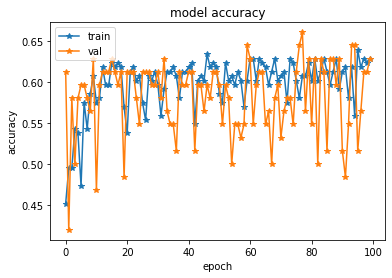

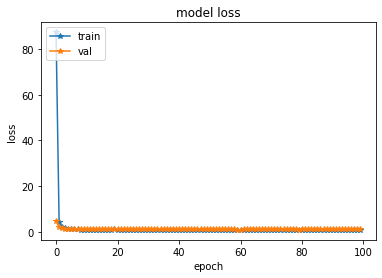

In [59]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = "*")
plt.plot(history.history['val_accuracy'], marker = "*")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = "*")
plt.plot(history.history['val_loss'], marker = "*")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [60]:
score = model.evaluate(x_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.9067 - accuracy: 0.6190
Test loss: 0.9067420363426208
Test accuracy: 0.6190476417541504


In [93]:
y_scores = model.predict(x_test)
fpr_nn, tpr_nn, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_nn = auc(fpr_nn, tpr_nn)

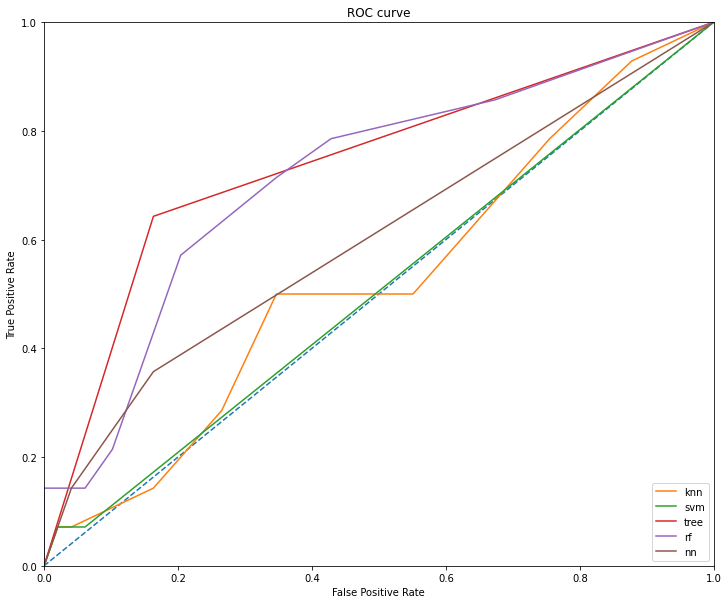

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_knn, tpr_knn, label = "knn")
ax.plot(fpr_svm, tpr_svm, label = "svm")
ax.plot(fpr_tree, tpr_tree, label = "tree")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_nn, tpr_nn, label = "nn")

# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()